<a href="https://colab.research.google.com/github/Purinkai001/Train/blob/main/Cheminfor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 19.9 MB/s eta 0:00:00


In [2]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.8 MB/s eta 0:00:00


**1. SMILES and Molecular Fingerprint-based Similarity Search (Easy)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole


from chembl_webresource_client.new_client import new_client

target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
selected_target = targets['target_chembl_id'][6]
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [ ]:
df.isna().sum()
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df.canonical_smiles

,canonical_smiles
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21
1,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21
4,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]
...,...
128,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...
129,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C
130,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12
131,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1


In [ ]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [ ]:
df.shape

(133, 46)

In [ ]:
selection = df[['molecule_chembl_id','canonical_smiles','standard_value']]
selection.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0


In [ ]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

descriptor_names = [desc_name[0] for desc_name in Descriptors.descList]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calc_descriptors(smiles_dataframe):
    smiles = smiles_dataframe['canonical_smiles']
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    descriptors = [calculator.CalcDescriptors(mol) for mol in mols]
    descriptor_df = pd.DataFrame(descriptors, columns=descriptor_names)
    return descriptor_df

des_df = calc_descriptors(selection)
des_df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.153169,12.153169,0.226826,-0.597139,0.784329,13.476190,281.271,270.183,281.080041,104,...,0,0,0,0,0,0,0,0,0,0
1,13.063283,13.063283,0.136190,-0.590378,0.552472,13.761905,415.589,407.525,414.927232,106,...,0,0,0,0,0,0,0,0,0,0
2,12.270381,12.270381,0.284226,-0.509761,0.553064,19.000000,421.190,409.094,420.981106,116,...,0,0,0,0,0,0,0,0,0,0
3,12.162811,12.162811,0.410453,-0.436430,0.676575,14.000000,293.347,282.259,293.051050,102,...,0,0,0,0,0,0,0,1,0,0
4,12.315033,12.315033,0.092552,-0.725226,0.415474,13.583333,338.344,328.264,338.036128,118,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
des_df.shape

(133, 210)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(des_df, selection['standard_value'], test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7325632497260408

In [ ]:
def generate_lipinski(mol):

    Mw = Descriptors.MolWt(mol)
    LogP = Descriptors.MolLogP(mol)
    NumHDonors = Descriptors.NumHDonors(mol)
    NumHAcceptors = Descriptors.NumHAcceptors(mol)
    row = np.array([Mw, LogP, NumHDonors, NumHAcceptors])

    return row

for i, smiles in enumerate(selection['canonical_smiles']):
    mol = Chem.MolFromSmiles(smiles)
    row = generate_lipinski(mol)
    if i == 0:
        lipinski = row
    else:
        lipinski = np.vstack([lipinski, row])
lipinski_df = pd.DataFrame(lipinski, columns=['MW', 'LogP', 'NumHDonors', 'NumHAcceptors'])
lipinski_df

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [ ]:
lipinski = pd.concat([selection, lipinski_df], axis=1)
lipinski

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,278.307,3.29102,0.0,3.0


In [ ]:
lipinski = lipinski[lipinski['MW'] <= 500 ]
lipinski = lipinski[lipinski['LogP'] <= 5 ]
lipinski = lipinski[lipinski['NumHDonors'] <= 10 ]
lipinski = lipinski[lipinski['NumHAcceptors'] <= 10 ]
lipinski.head()
lipinski.shape

(102, 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(lipinski[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']], lipinski['standard_value'], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7920848791361431

In [ ]:
lipinski.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors'],
      dtype='object')

**2. Molecular Clustering for Chemical Libraries (Easy)**

In [ ]:
df = lipinski.copy()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors,cluster
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,281.271,1.89262,0.0,5.0,0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,415.589,3.81320,0.0,2.0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,421.190,2.66050,0.0,4.0,2
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,293.347,3.63080,0.0,3.0,2
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,338.344,3.53900,0.0,5.0,2


In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['cluster_hierarchical'] = hierarchical.fit_predict(X_scaled)

df.head()

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors,cluster,cluster_hierarchical
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,281.271,1.89262,0.0,5.0,0,2
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,415.589,3.81320,0.0,2.0,2,1
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,421.190,2.66050,0.0,4.0,2,1
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,293.347,3.63080,0.0,3.0,2,1
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,338.344,3.53900,0.0,5.0,2,2


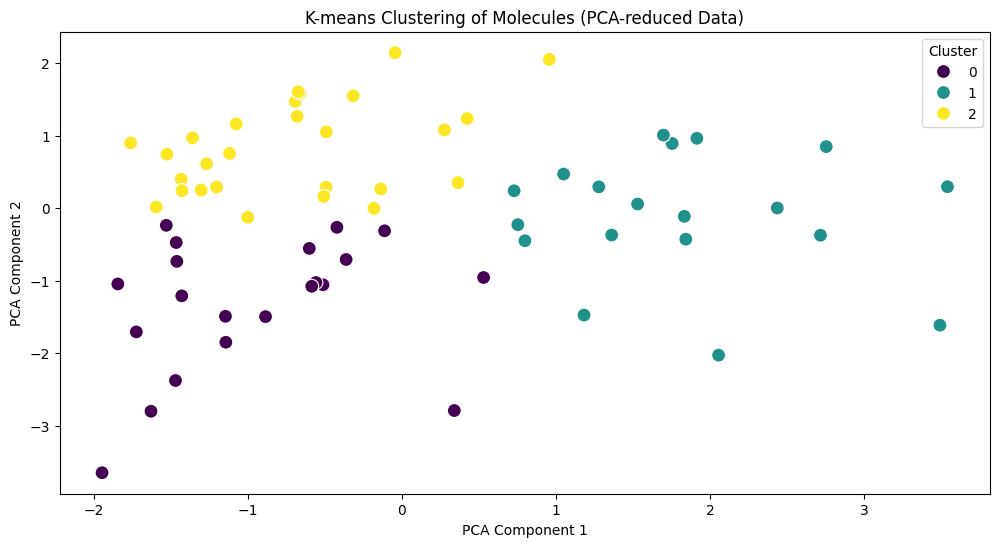

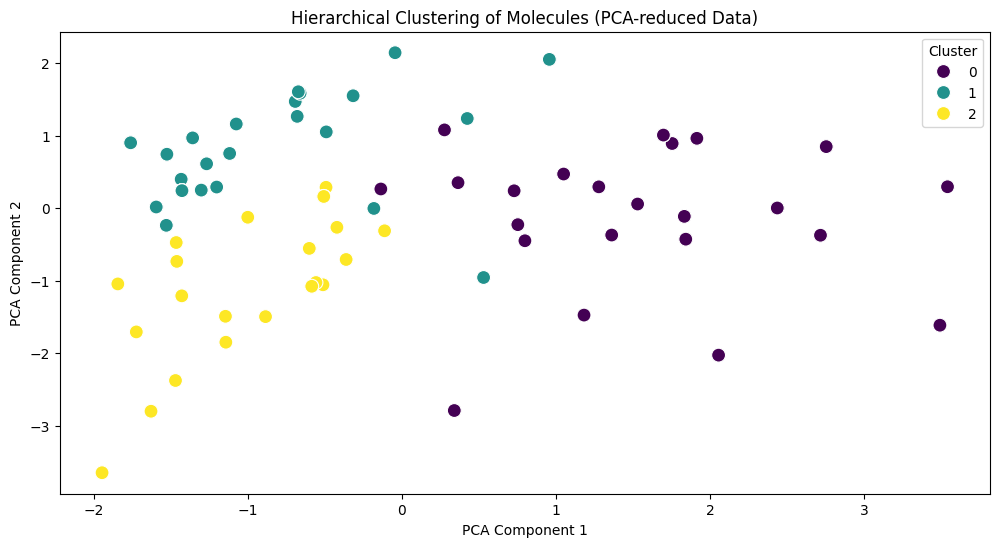

In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.title("K-means Clustering of Molecules (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_hierarchical'], palette='viridis', s=100)
plt.title("Hierarchical Clustering of Molecules (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

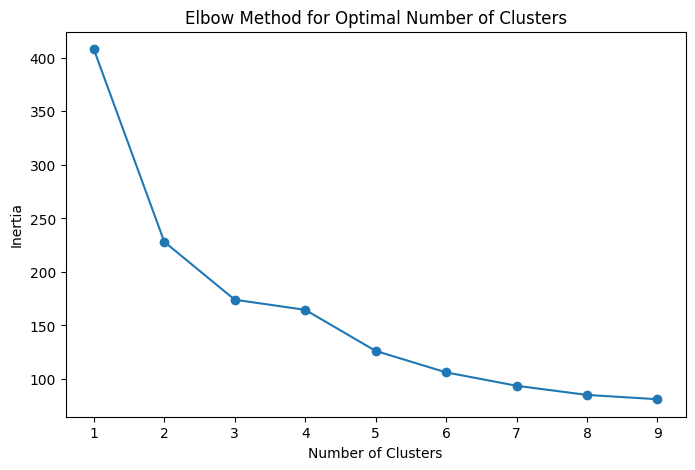

In [ ]:
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Silhouette Score for K-means Clustering: 0.34
Silhouette Score for K=2: 0.42
Silhouette Score for K=3: 0.34
Silhouette Score for K=4: 0.30
Silhouette Score for K=5: 0.35
Silhouette Score for K=6: 0.34
Silhouette Score for K=7: 0.35
Silhouette Score for K=8: 0.33
Silhouette Score for K=9: 0.30
Silhouette Score for K=10: 0.33


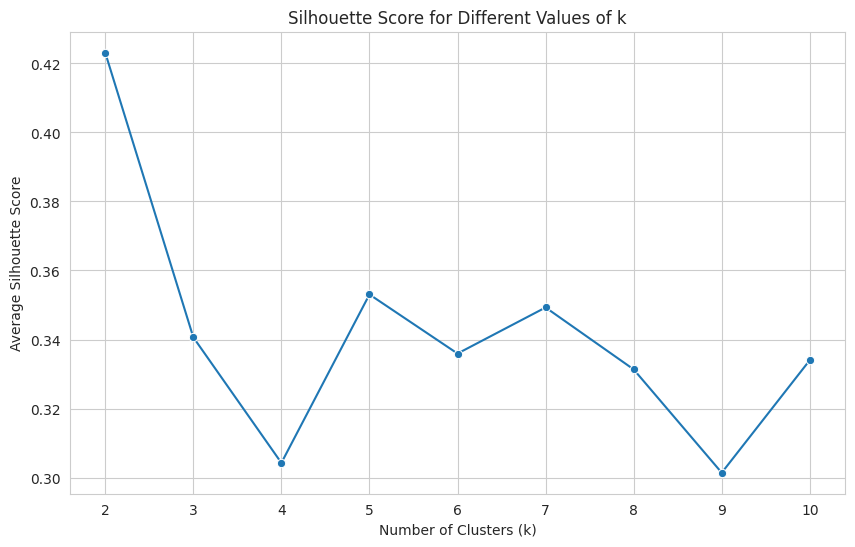

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score for K-means Clustering: {score:.2f}')

def silhouette_plot(df):
    features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    ans = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f'Silhouette Score for K={k}: {silhouette_avg:.2f}')
        ans.append(silhouette_avg)
    return ans
silhouette_list = silhouette_plot(df)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=silhouette_list, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

**Level 1 Quests**

**3. QSAR Model for Drug Discovery (Intermediate)**

In [ ]:
'''
3. QSAR Model for Drug Discovery (Intermediate)
XP: 100
Objective: Build a QSAR model to predict the bioactivity of molecules. This project introduces QSAR concepts and how molecular properties can predict biological activity.
Tools: RDKit, Scikit-learn.
Learning Focus: Model building, regression algorithms, QSAR.

???
'''



**4. Predicting ADMET Properties (Intermediate)**

In [ ]:
'''
4. Predicting ADMET Properties (Intermediate)
XP: 120
Objective: Build a predictive model for ADMET properties like solubility and toxicity. Understanding how molecular descriptors impact these properties will help develop more efficient drugs.
Tools: RDKit, PyCaret or Scikit-learn.
Learning Focus: Descriptor generation, predictive modeling.
'''

'\n4. Predicting ADMET Properties (Intermediate)\nXP: 120\nObjective: Build a predictive model for ADMET properties like solubility and toxicity. Understanding how molecular descriptors impact these properties will help develop more efficient drugs.\nTools: RDKit, PyCaret or Scikit-learn.\nLearning Focus: Descriptor generation, predictive modeling.\n'

In [ ]:
lipinski

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,278.307,3.29102,0.0,3.0


In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [11]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from tqdm import tqdm
target = new_client.target
target_query = target.search('CHEMBL6173')
targets = pd.DataFrame.from_dict(target_query)
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00395', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome c oxidase subunit 1,17.0,False,CHEMBL6173,"[{'accession': 'P00395', 'component_descriptio...",SINGLE PROTEIN,9606


In [14]:
activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL6173').filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [17]:
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df.canonical_smiles

,canonical_smiles
0,COc1ccc(-c2cnc(C(=O)N3CCN(c4cc(C(=O)O)c5ccccc5...
1,Cc1ccc(-c2nc(C(=O)N3CCN(c4cc(C(=O)O)c5ccccc5c4...
2,CS(=O)(=O)c1ccc(C2=C(c3ccccc3)C(=O)OC2)cc1
3,COc1ccc(-c2nc(N3N=C(c4ccc(F)cc4)CCC3=O)n(C)c(=...
4,C[C@H](C(=O)O)c1ccc(C[C@H]2CCC[C@@H]2O)cc1
5,C[C@H](C(=O)O)c1ccc(C[C@H]2CCC[C@@H]2O)cc1
6,C[C@H](C(=O)O)c1ccc(C[C@H]2CCC[C@@H]2O)cc1


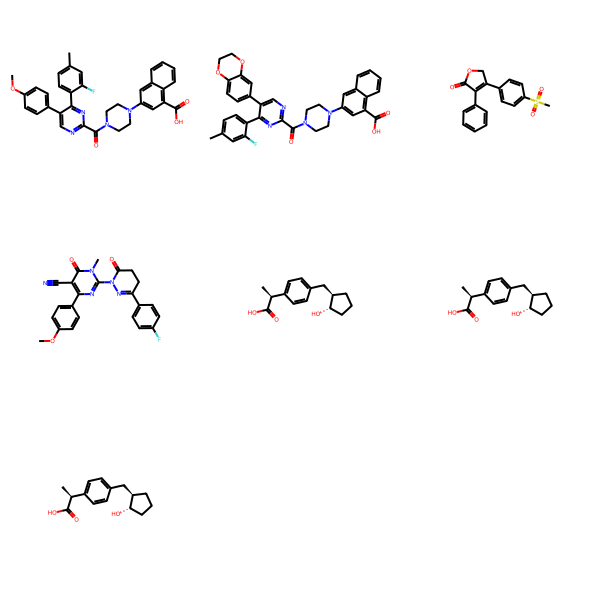

In [20]:
def create_mol(df):
    smiles = df['canonical_smiles']
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    return mols
Chem.Draw.MolsToGridImage(create_mol(df))

In [21]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

descriptor_names = [desc_name[0] for desc_name in Descriptors.descList]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calc_descriptors(smiles_dataframe):
    smiles = smiles_dataframe['canonical_smiles']
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    descriptors = [calculator.CalcDescriptors(mol) for mol in mols]
    descriptor_df = pd.DataFrame(descriptors, columns=descriptor_names)
    return descriptor_df

des_df = calc_descriptors(df)
des_df.head()

[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerator
[12:40:12] DEPRECATION WARNING: please use MorganGenerat

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,15.200076,15.200076,0.014301,-0.983410,0.261756,13.279070,576.628,547.396,576.217284,216,...,0,0,0,0,0,0,0,0,0,0
1,15.329972,15.329972,0.029086,-0.986552,0.266800,14.444444,604.638,575.406,604.212198,226,...,0,0,0,0,0,0,0,0,0,0
2,12.008679,12.008679,0.195717,-3.233809,0.816995,15.045455,314.362,300.250,314.061280,112,...,0,0,1,0,0,0,0,0,0,0
3,13.292955,13.292955,0.010065,-0.597015,0.632196,13.500000,431.427,413.283,431.139368,160,...,0,0,0,0,0,0,0,0,0,0
4,10.873265,10.873265,0.164241,-0.797255,0.860660,25.000000,248.322,228.162,248.141244,98,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = [desc_name[0] for desc_name in Descriptors.descList]
X = des_df[features]
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,15.200076,15.200076,0.014301,-0.983410,0.261756,13.279070,576.628,547.396,576.217284,216,...,0,0,0,0,0,0,0,0,0,0
1,15.329972,15.329972,0.029086,-0.986552,0.266800,14.444444,604.638,575.406,604.212198,226,...,0,0,0,0,0,0,0,0,0,0
2,12.008679,12.008679,0.195717,-3.233809,0.816995,15.045455,314.362,300.250,314.061280,112,...,0,0,1,0,0,0,0,0,0,0
3,13.292955,13.292955,0.010065,-0.597015,0.632196,13.500000,431.427,413.283,431.139368,160,...,0,0,0,0,0,0,0,0,0,0
4,10.873265,10.873265,0.164241,-0.797255,0.860660,25.000000,248.322,228.162,248.141244,98,...,0,0,0,0,0,0,0,0,0,0
5,10.873265,10.873265,0.164241,-0.797255,0.860660,25.000000,248.322,228.162,248.141244,98,...,0,0,0,0,0,0,0,0,0,0
6,10.873265,10.873265,0.164241,-0.797255,0.860660,25.000000,248.322,228.162,248.141244,98,...,0,0,0,0,0,0,0,0,0,0


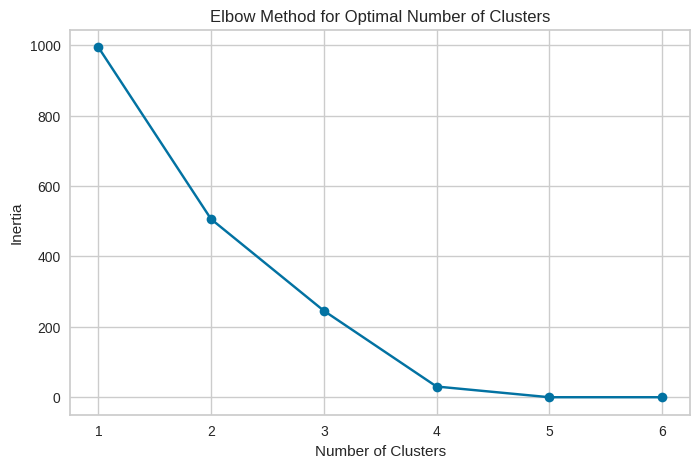

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

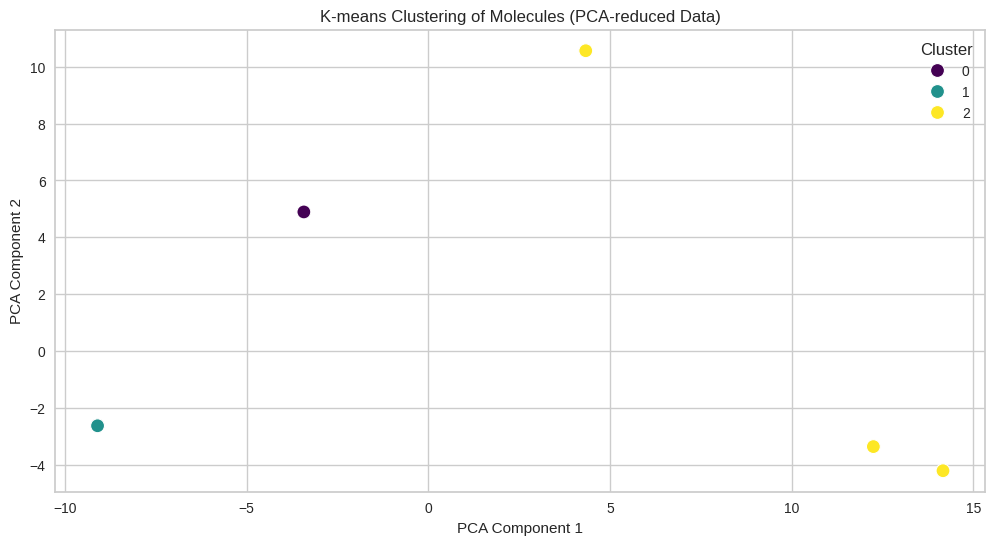

In [31]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.title("K-means Clustering of Molecules (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

#I mean, clustering a small group is not a good thing to do anyway right?

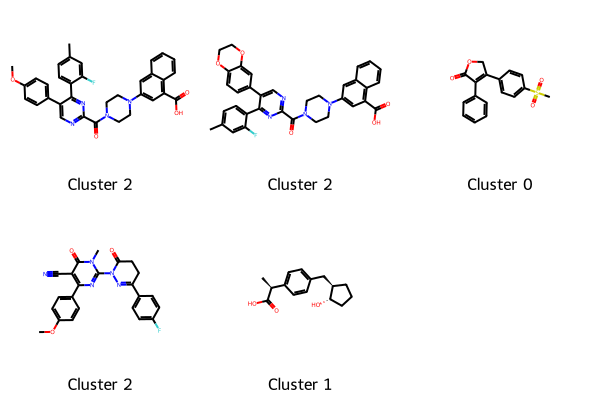

In [40]:
df = df.drop_duplicates(subset=['canonical_smiles'])
Chem.Draw.MolsToGridImage(create_mol(df), molsPerRow=3, subImgSize=(200, 200), legends=[f"Cluster {i}" for i in df['cluster']])
